In [943]:
# Importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing warning
import warnings
warnings.filterwarnings('ignore')

In [1364]:
# Loading data
data = pd.read_csv('airline-passenger-traffic.csv', header=None)
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.tail(10)

,Passengers
Month,
1960-03-01,NaN
1960-04-01,461.0
1960-05-01,472.0
1960-06-01,535.0
1960-07-01,622.0
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0
1960-11-01,390.0


## Time Series Analysis

####  Plot time series data

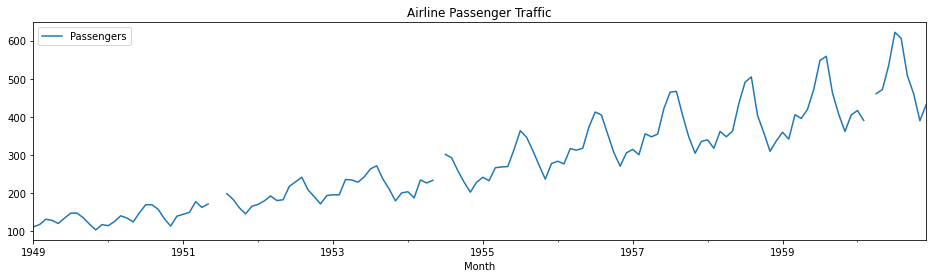

In [945]:
data.plot(figsize=(16,4))
plt.title("Airline Passenger Traffic")
plt.legend(loc='best')
plt.show(block=False)

## Missing values Treatement

#### Mean Interpolation

In [946]:
data.isnull().sum()

Passengers    4
dtype: int64

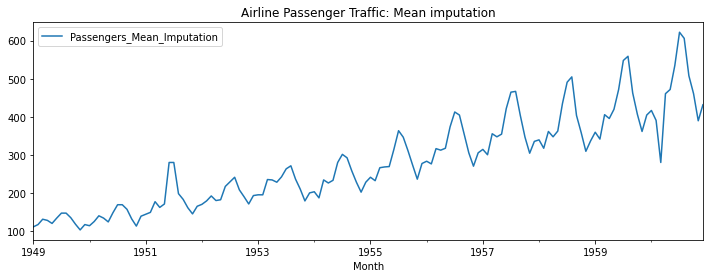

In [947]:
#data['Passengers_Mean_Imputation']=data.Passengers.fillna(data.Passengers.mean())
data = data.assign(Passengers_Mean_Imputation= data.Passengers.fillna(data.Passengers.mean()))
data['Passengers_Mean_Imputation'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger Traffic: Mean imputation')
plt.show(block=False)

## Linear Interpolation

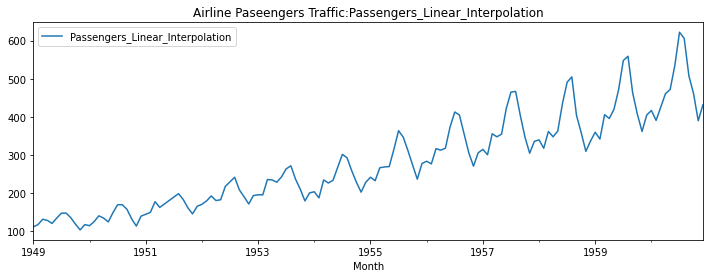

In [948]:
data = data.assign(Passengers_Linear_Interpolation = data.Passengers.interpolate(method='linear'))
data['Passengers_Linear_Interpolation'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Paseengers Traffic:Passengers_Linear_Interpolation')
plt.show()

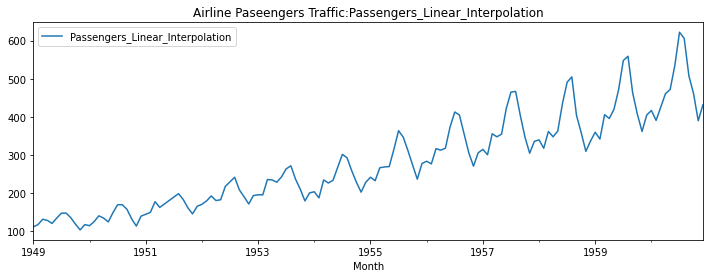

In [949]:
data = data.assign(Passengers_Linear_Interpolation = data.Passengers.interpolate(method='linear'))
data['Passengers_Linear_Interpolation'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Paseengers Traffic:Passengers_Linear_Interpolation')
plt.show()

In [950]:
data.head()

,Passengers,Passengers_Mean_Imputation,Passengers_Linear_Interpolation
Month,,,
1949-01-01,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0


In [951]:
# Finally replacing missing values with Linear Interpolations
data['Passengers'] = data['Passengers_Linear_Interpolation']
data.drop(['Passengers_Mean_Imputation','Passengers_Linear_Interpolation'], axis=1, inplace=True)

In [952]:
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


## Metrail Data

In [953]:
# Loading the dataset
import datetime
rail = pd.read_csv('Metrail+dataset.csv')
rail.columns=['Month','Travellers']
rail['Month']=[datetime.datetime.strptime(x,'%b-%y').strftime('%Y-%m-%d') for x in rail['Month']]
# [datetime.datetime.strptime(x,'%d-%b-%y').strftime('%Y-%m-%d') for x in df]
rail=rail.set_index('Month')
rail.head()

,Travellers
Month,
1991-01-01,1724.0
1991-02-01,1638.0
1991-03-01,1987.0
1991-04-01,1825.0
1991-05-01,NaN


In [954]:
rail.shape

(159, 1)

In [955]:
rail.head(), rail.tail()

(            Travellers
 Month                 
 1991-01-01      1724.0
 1991-02-01      1638.0
 1991-03-01      1987.0
 1991-04-01      1825.0
 1991-05-01         NaN,
             Travellers
 Month                 
 2003-11-01      2091.0
 2003-12-01      2155.0
 2004-01-01      1848.0
 2004-02-01      1852.0
 2004-03-01      2145.0)

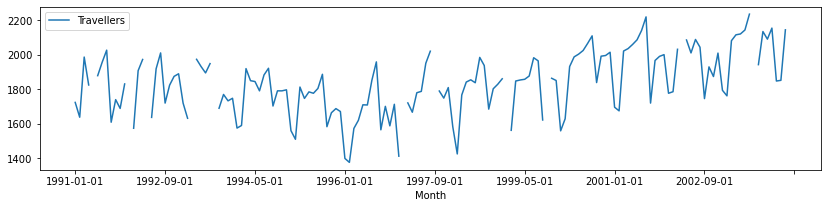

In [956]:
rail.plot(figsize=(14,3))
plt.show(block=True)

In [957]:
# missing values are replaced with the last value observed value
rail[rail.Travellers.isnull()]

,Travellers
Month,
1991-05-01,NaN
1992-01-01,NaN
1992-05-01,NaN
1993-03-01,NaN
1993-08-01,NaN
1997-02-01,NaN
1997-09-01,NaN
1999-01-01,NaN
1999-10-01,NaN


In [958]:
# Use the command fillna(method ='pad')
#rail = rail.fillna(method='pad')
rail['Travellers_pad'] = rail['Travellers'].fillna(method='ffill')

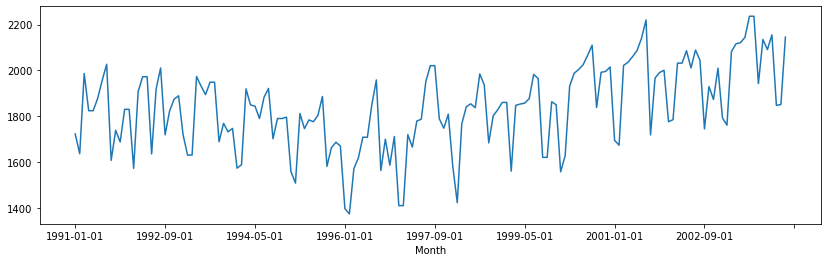

In [959]:
rail['Travellers_pad'].plot(figsize=(14,4))

In [960]:
rail.Travellers_pad.mean()

1838.685534591195

In [961]:
rail['Travellers_bfill'] = rail['Travellers'].fillna(method='bfill')

In [962]:
rail['Travellers_bfill'].mean()

1834.446540880503

In [963]:
rail['Travellers_linear'] = rail['Travellers'].interpolate(method='linear')

In [964]:
rail['Travellers_linear'].mean()

1836.566037735849

# Detecting Outliers

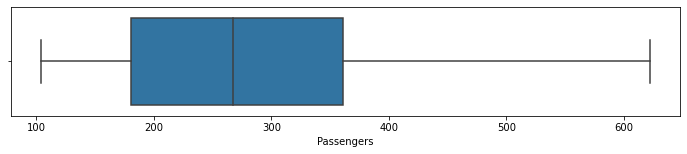

In [965]:
# Airline Passenger Traffic Control
# Boxplot
# Interquartile Range Q3-Q1 (360-180=180)
# 360+(1.5*180) = 630
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x = data['Passengers'], whis = 1.5)
plt.show()

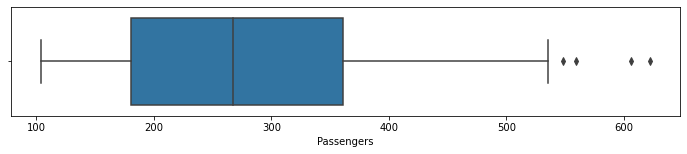

In [966]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x = data['Passengers'], whis = 1)
plt.show()

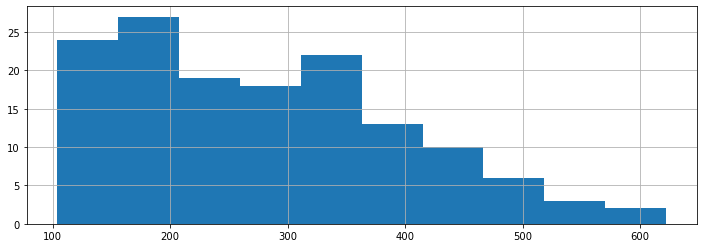

In [967]:
# Outliers using Histogram
fig = data.Passengers.hist(figsize=(12,4))

No outliers detected in above either using boxplot or histogram

# Time Series Decomposition

### Additive Seasonal Decomposition

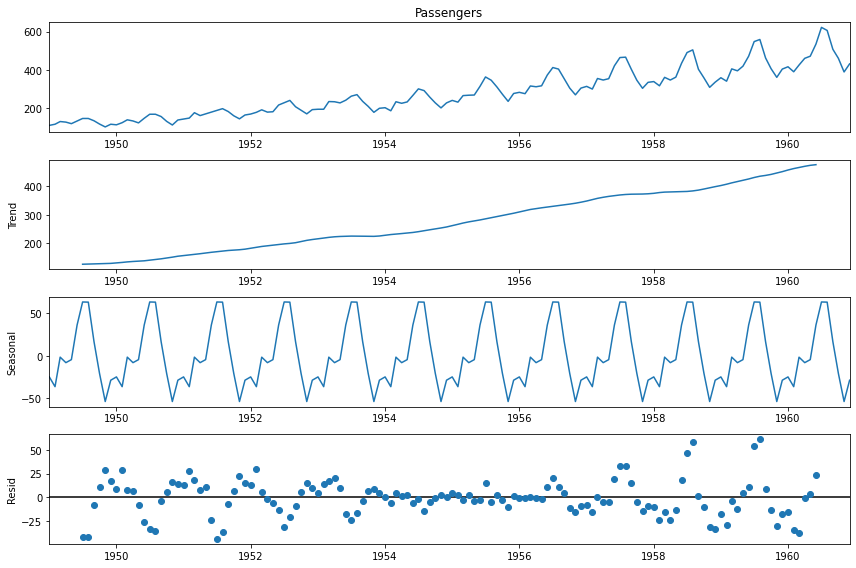

In [968]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize']= 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive') # additive seasonal index
fig=decomposition.plot()
plt.show()

In [969]:
# Multiplicative seasonal decomposition

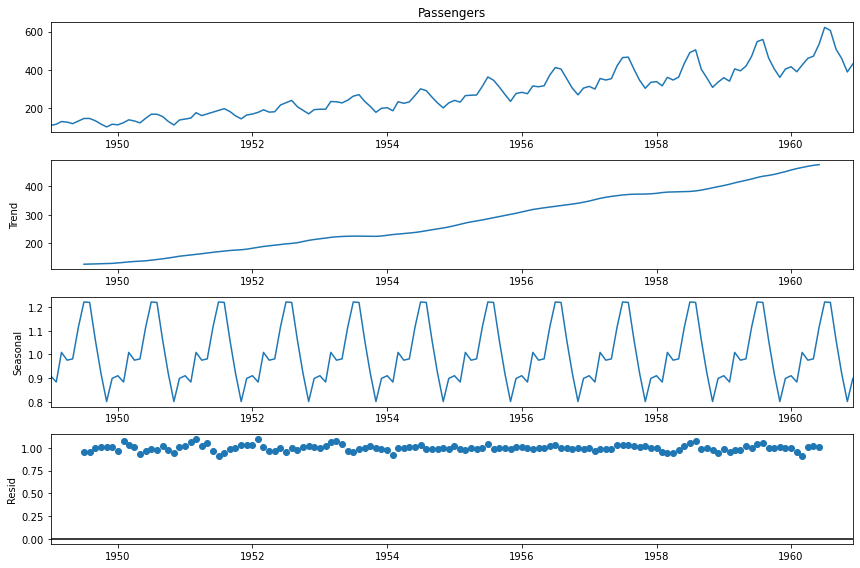

In [970]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model = 'multiplicative') # multiplicative seasonal decompose
decomposition.plot()
plt.show()

# Build and evaluate model

### Train and test split

In [971]:
# Splitting data
train_len = 120
train = data[0:train_len]
test = data[train_len:]

In [972]:
test.tail()

,Passengers
Month,
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0
1960-11-01,390.0
1960-12-01,432.0


### Naive Method

In [973]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

In [974]:
y_hat_naive.tail()

,Passengers,naive_forecast
Month,,
1960-08-01,606.0,337.0
1960-09-01,508.0,337.0
1960-10-01,461.0,337.0
1960-11-01,390.0,337.0
1960-12-01,432.0,337.0


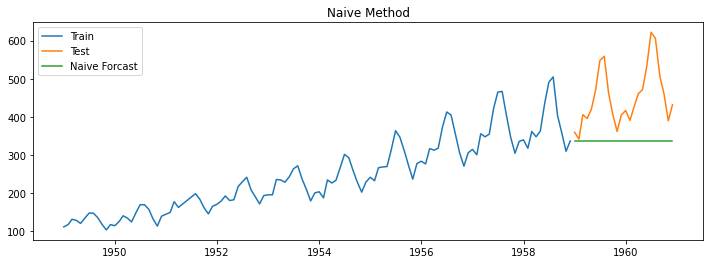

In [975]:
# Plotting train, test, forcast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forcast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

# Simple Mean/Average Method

In [976]:
y_hat_mean = test.copy()
y_hat_mean['mean_forecast'] = train['Passengers'].mean()

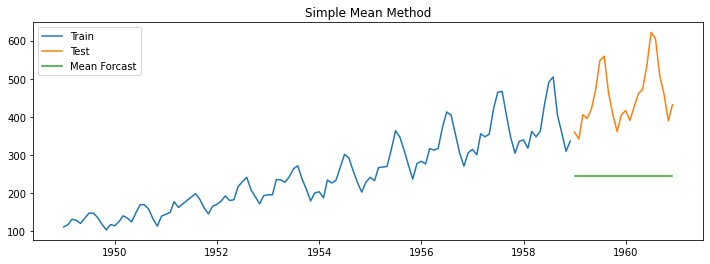

In [977]:
# Plotting train, test, forcast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_mean['mean_forecast'], label='Mean Forcast')
plt.legend(loc='best')
plt.title('Simple Mean Method')
plt.show()

# Calculate RMSE and MAPE

In [978]:
# For the Naive method
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100,2)

In [979]:
results = pd.DataFrame({'Method': ['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})

In [980]:
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63


In [981]:
# Simple Average Method

rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_mean['mean_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_mean['mean_forecast'])/test['Passengers'])*100,2)

In [982]:
tempResult = pd.DataFrame({'Method':['Average method'], 'RMSE':[rmse], 'MAPE':[mape]})

In [983]:
results = pd.concat([results,tempResult])

In [984]:
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Average method,219.69,44.28


### Practice Question Start  ---  Exchange rate data

In [985]:
# Practice Question for TimeSeries
exch = pd.read_csv('exchange-rate-twi.csv')

In [986]:
exch=exch.set_index('Month')
exch.head()

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2


In [987]:
train_len_exch = 212
train_exch = exch[0:train_len_exch]
test_exch = exch[train_len_exch:]

In [988]:
test_exch.shape

(92, 1)

In [989]:
# Simple Average Method
y_hat_avg =  test_exch.copy()
y_hat_avg['avg_forecast'] = train_exch['Exchange Rate TWI'].mean().round(2)

In [990]:
y_hat_avg.head()

,Exchange Rate TWI,avg_forecast
Month,,
213,52.5,88.33
214,53.1,88.33
215,53.8,88.33
216,55.2,88.33
217,58.9,88.33


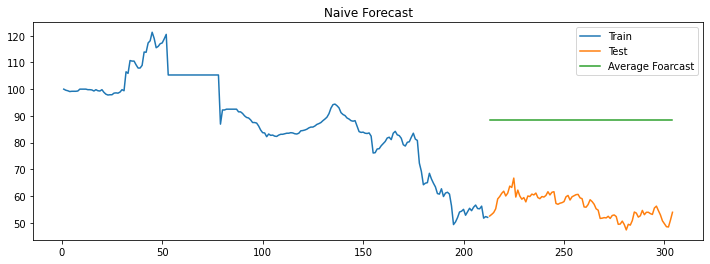

In [991]:
# Plot train, test, foarcast
plt.figure(figsize=(12,4))
plt.plot(train_exch['Exchange Rate TWI'], label='Train')
plt.plot(test_exch['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Foarcast')
plt.title('Naive Forecast')
plt.legend(loc='best')
plt.show()

In [992]:
# Forecast using Naive method
y_hat_naive = test_exch.copy()
y_hat_naive['naive_forecast'] = train_exch['Exchange Rate TWI'][train_len_exch-1]
y_hat_naive.tail()
# 211 52.3 
# 212 52.0 

,Exchange Rate TWI,naive_forecast
Month,,
300,49.6,52.3
301,48.5,52.3
302,48.4,52.3
303,51.0,52.3
304,53.9,52.3


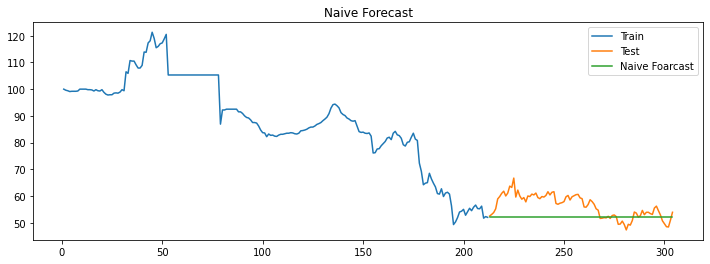

In [993]:
# Plot train, test, foarcast
plt.figure(figsize=(12,4))
plt.plot(train_exch['Exchange Rate TWI'], label='Train')
plt.plot(test_exch['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Foarcast')
plt.title('Naive Forecast')
plt.legend(loc='best')
plt.show()

In [994]:
# Simple Average Method RMSE and MAPE.
rmse = np.sqrt(mean_squared_error(test_exch['Exchange Rate TWI'],y_hat_avg['avg_forecast'])).round(2)
mape = round(np.mean(np.abs(test_exch['Exchange Rate TWI']-y_hat_avg['avg_forecast'])/test_exch['Exchange Rate TWI'])*100)

In [995]:
print(rmse,mape)

32.42 58.0


In [996]:
# Naive Method
rmse = np.sqrt(mean_squared_error(test_exch['Exchange Rate TWI'],y_hat_naive['naive_forecast'])).round(2)
mape = round(np.mean(np.abs(test_exch['Exchange Rate TWI']-y_hat_naive['naive_forecast'])/test_exch['Exchange Rate TWI'])*100)

In [997]:
print(rmse,mape)

5.78 8.0


In [998]:
100-mape

92.0

#### Simple Moving Average Method

In [999]:
y_hat_exch_sma = exch.copy()
ma_window = 3
y_hat_exch_sma['sma_forecast'] = y_hat_exch_sma['Exchange Rate TWI'].rolling(ma_window).mean()
y_hat_exch_sma['sma_forecast'][train_len_exch:] = y_hat_exch_sma['sma_forecast'][train_len_exch-1]

In [1000]:
test_exch['Exchange Rate TWI'].shape
y_hat_exch_sma['sma_forecast'][train_len_exch:].shape

(92,)

In [1001]:
# RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_exch['Exchange Rate TWI'],y_hat_exch_sma['sma_forecast'][train_len_exch:])).round(2)
mape = round(np.mean(np.abs(test_exch['Exchange Rate TWI']-y_hat_exch_sma['sma_forecast'][train_len_exch:])/test_exch['Exchange Rate TWI']*100),2)

In [1002]:
print(rmse, mape)
# 12 Month Window 4.57 6.89
# 6 Month Window 4.58 6.9  
# 3 Month Window 5.1 7.32  5.98 and 8.41 respectively

5.1 7.32


## Stationary Check

### kpss test

In [1003]:
# Test
from statsmodels.tsa.stattools import kpss
kpss_exch = kpss(exch['Exchange Rate TWI'])

kpss_exch

(1.7258967599333663,
 0.01,
 16,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

#### ADF Test

In [1004]:
from statsmodels.tsa.stattools import adfuller
adf_exch = adfuller(exch['Exchange Rate TWI'])
adf_exch

(-0.8054678720541538,
 0.8175106426685049,
 0,
 303,
 {'1%': -3.4521175397304784,
  '5%': -2.8711265007266666,
  '10%': -2.571877823851692},
 1268.8696918056114)

### Practice Question End

## Simple moving average method

In [1005]:
y_hat_sma = data.copy()
ma_windod = 12
y_hat_sma['sma_forecast'] = y_hat_sma['Passengers'].rolling(ma_windod).mean().round(2)
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [1006]:
y_hat_sma.tail()

,Passengers,sma_forecast
Month,,
1960-08-01,606.0,381.0
1960-09-01,508.0,381.0
1960-10-01,461.0,381.0
1960-11-01,390.0,381.0
1960-12-01,432.0,381.0


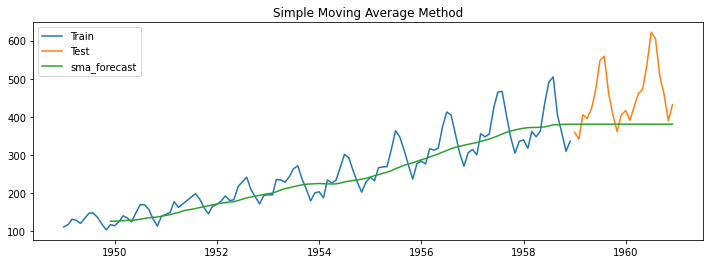

In [1007]:
# Plot Train, Test, forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='sma_forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

#### Calculating RMSE and MAPE

In [1008]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers']*100),2)
tempResult = pd.DataFrame({'Method':['Simple Moving Average'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResult])

In [1009]:
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Average method,219.69,44.28
0,Simple Moving Average,103.33,15.54


# Simple exponential smoothig
-- captures the level of a time series

In [1010]:
# Importing libraries
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2, optimized=False)
#model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

In [1011]:
y_hat_ses.shape

(24, 2)

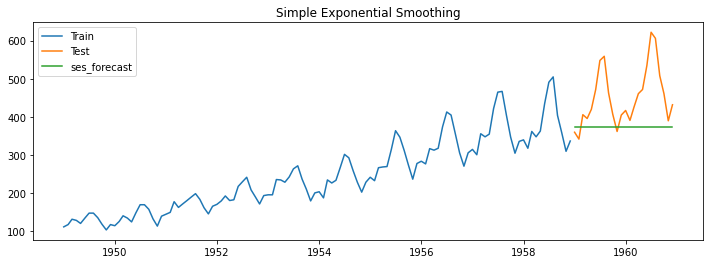

In [1012]:
# Plot Train, Test, forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='ses_forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing')
plt.show()

In [1013]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ses['ses_forecast'])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers']*100),2)
tempResult = pd.DataFrame({'Method':['Simple Exponential Smoothing'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResult])

In [1014]:
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49


# Daily Temperature Practice Start

In [1015]:
dtemp = pd.read_csv('Daily+temperature+data.csv')

In [1016]:
# Reindexing , setting Date as index
dtemp = dtemp.set_index('Date')

In [1017]:
dtemp.head()

,Temperature(Min)
Date,
01-01-2017,14.3
01-02-2017,17.4
01-03-2017,18.5
01-04-2017,16.8
01-05-2017,11.5


##### Split data in Train and Test

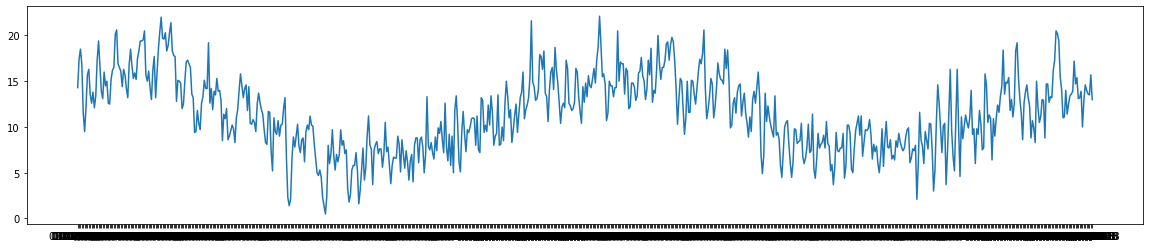

In [1018]:
plt.figure(figsize=(20,4))
plt.plot(dtemp)
plt.show()

In [1019]:
# Use the first 511 rows as the train data
tain_dt_len = 511
train_dt = dtemp[0:tain_dt_len]
test_dt = dtemp[tain_dt_len:]

In [1020]:
len(test_dt)

219

In [1021]:
# Simple Exponential Smoothing 
method = SimpleExpSmoothing(train_dt['Temperature(Min)'])
method_fit = method.fit(smoothing_level=.2, optimized=False)
y_hat_dtemp = test_dt.copy()
y_hat_dtemp['ses_forecast'] = method_fit.forecast(len(test_dt))

In [1022]:
rmse = np.sqrt(mean_squared_error(test_dt['Temperature(Min)'],y_hat_dtemp['ses_forecast'])).round(2)
mape = round(np.mean(np.abs(test_dt['Temperature(Min)']-y_hat_dtemp['ses_forecast'])/test_dt['Temperature(Min)']*100),2)

In [1023]:
print(rmse, mape)

3.56 30.24


### Holts Method

In [1024]:
# Importing Libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [1025]:
# model_dt = ExponentialSmoothing(np.array(train_dt['Temperature(Min)']), seasonal_periods=12, trend = 'additive', seasonal=None)
model_dt = ExponentialSmoothing(np.array(train_dt['Temperature(Min)']), seasonal_periods=30, trend = 'additive', seasonal='add')
# model_dt_fit = model_dt.fit(smoothing_level=0.5,smoothing_slope=0.01, optimized=False)
model_dt_fit = model_dt.fit(optimized=True)
y_hat_dt_hwa_opt = test_dt.copy()
y_hat_dt_hwa_opt['hwa_forecast'] = model_dt_fit.forecast(len(test_dt))

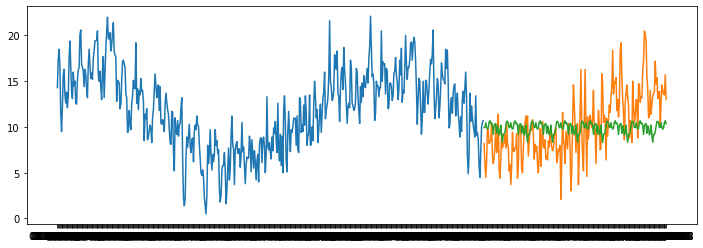

In [1026]:
plt.figure(figsize=(12,4))
plt.plot(train_dt['Temperature(Min)'], label='Train')
plt.plot(test_dt['Temperature(Min)'], label='Test')
plt.plot(y_hat_dt_hwa_opt['hwa_forecast'], label='Forecast')

In [1027]:
rmse = np.sqrt(mean_squared_error(test_dt['Temperature(Min)'],y_hat_dt_hwa_opt['hwa_forecast'])).round(2)
mape = round(np.mean(np.abs(test_dt['Temperature(Min)']-y_hat_dt_hwa_opt['hwa_forecast'])/test_dt['Temperature(Min)']*100),2)

In [1028]:
print(rmse, mape)

3.5 32.83


# Daily Temperature Practice End

# Holt Exponential Smoothing
- On Aitline Passenger Traffic

In [1029]:
# Importing required Libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [1030]:
model = ExponentialSmoothing(np.array(train['Passengers']), seasonal_periods=12, trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


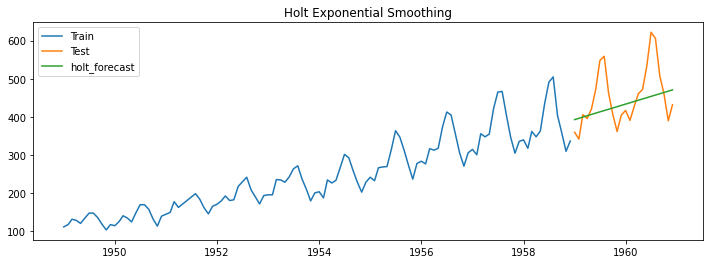

In [1031]:
# Plot Train, Test, Forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='holt_forecast')
plt.legend(loc='best')
plt.title('Holt Exponential Smoothing')
plt.show()

In [1032]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_holt['holt_forecast'])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers']*100),2)
tempResult = pd.DataFrame({'Method':['Holt Exponential Smoothing'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResult])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holt Exponential Smoothing,71.94,11.11


# Holt's Winter Additive with treds and seanality

In [1033]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend = 'add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2631578931410015, 'smoothing_slope': 0.05162966025765116, 'smoothing_seasonal': 0.7368421036673173, 'damping_slope': nan, 'initial_level': 211.55099866332293, 'initial_slope': 1.7391915752033313, 'initial_seasons': array([-100.18118437,  -94.2046477 ,  -80.29175565,  -83.41758365,
        -91.45908078,  -77.4509434 ,  -64.48324357,  -64.57340564,
        -76.66644176,  -93.73584142, -108.67610965,  -94.50947707]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


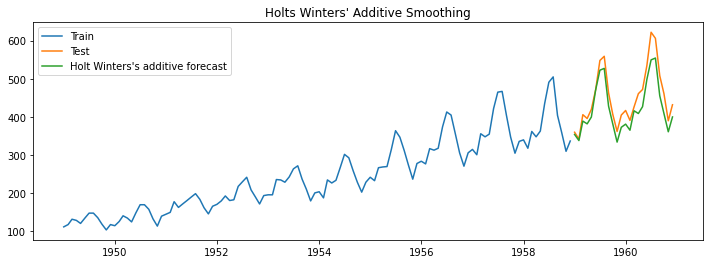

In [1034]:
# Plot Train, Test, Forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holts Winters\' Additive Smoothing')
plt.show()

In [1035]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_hwa['hwa_forecast'])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_hwa['hwa_forecast'])/test['Passengers']*100),2)
tempResult = pd.DataFrame({'Method':['Holt Winters\'s Additive'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResult])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holt Exponential Smoothing,71.94,11.11
0,Holt Winters's Additive,35.10,6.53


# Holt Winters Mutiplicative

In [1036]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend = 'add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hwm_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.38297792357726124, 'smoothing_slope': 0.035502695358352605, 'smoothing_seasonal': 0.6170220681283785, 'damping_slope': nan, 'initial_level': 212.3983506469908, 'initial_slope': 1.095376632423797, 'initial_seasons': array([0.51702061, 0.5454338 , 0.60215765, 0.56916567, 0.51982655,
       0.57235007, 0.62776238, 0.62555286, 0.57005795, 0.49511555,
       0.43967716, 0.51387414]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


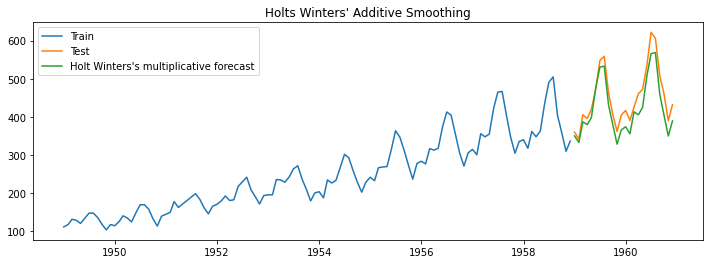

In [1037]:
# Plot Train, Test, Forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt Winters\'s multiplicative forecast')
plt.legend(loc='best')
plt.title('Holts Winters\' Additive Smoothing')
plt.show()

In [1038]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_hwm['hwm_forecast'])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_hwm['hwm_forecast'])/test['Passengers']*100),2)
tempResult = pd.DataFrame({'Method':['Holt Winters\'s Additive'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResult])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holt Exponential Smoothing,71.94,11.11
0,Holt Winters's Additive,35.10,6.53
0,Holt Winters's Additive,34.87,6.92


# Graded Questions Start

In [1039]:
bit = pd.read_csv('bitcoinfinal+(4).csv', header=None)
bit.columns = ['Month','Price']
bit =bit.set_index('Month')

In [1040]:
bit.head()

,Price
Month,
0,217.4
1,255.7
2,244.3
3,236.1
4,228.7


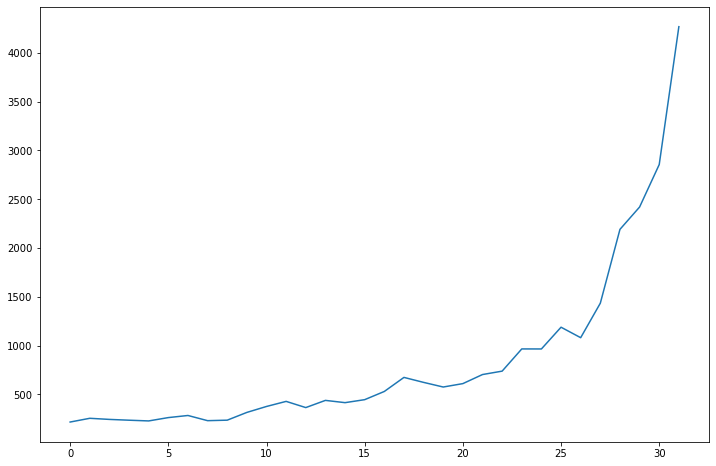

In [1041]:
plt.plot(bit)

# Train Test Split

In [1042]:
bit.shape

(32, 1)

In [1043]:
# train data (first 29 months) and test data (last 3 months)
bittrain_len=29
bittrain = bit[0:bittrain_len]
bittest = bit[bittrain_len:]

In [1044]:
print(bittrain.shape)
print(bittest.shape)

(29, 1)
(3, 1)


In [1045]:
# Naive Method
y_hat_naive_bit = bittest.copy()
y_hat_naive_bit['naive_forecast'] = bittrain['Price'][bittrain_len-1].round(2)   # 2191.8

In [1046]:
y_hat_naive_bit

,Price,naive_forecast
Month,,
29,2420.7,2191.8
30,2856.0,2191.8
31,4268.8,2191.8


In [1047]:
# Simple Average Method
y_hat_sam_bit = bittest.copy()
y_hat_sam_bit['sam_forecast'] = bittrain['Price'].mean().round(2)

In [1048]:
y_hat_sam_bit

,Price,sam_forecast
Month,,
29,2420.7,595.75
30,2856.0,595.75
31,4268.8,595.75


In [1049]:
# Calculate RMSE and MAPE
# For the Naive method
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(bittest['Price'],y_hat_naive_bit['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_naive_bit['naive_forecast'])/bittest['Price'])*100,2)

In [1050]:
# Creating dataframe to compare result
bitresults = pd.DataFrame({'Method': ['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.9,27.12


In [1051]:
# RMSE and MAPE for Simple Average Method
rmse = np.sqrt(mean_squared_error(bittest['Price'],y_hat_sam_bit['sam_forecast'])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_sam_bit['sam_forecast'])/bittest['Price'])*100,2)

In [1052]:
# Simple Average Method
tempResult = pd.DataFrame({'Method':['Simple Average method'], 'RMSE':[rmse], 'MAPE':[mape]})
bitresults = pd.concat([bitresults,tempResult])
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19


Lower the MAPE, more accurate the model.

### Forecast the average bitcoin price for the months 30 to 32, using the Simple Moving Average forecast method with a window size of 12 months

In [1053]:
# Simple Moving Average Method
ma_window = 12
y_hat_sma = bit.copy()
y_hat_sma['sma_forecast_12']= y_hat_sma['Price'].rolling(ma_window).mean().round(2)
y_hat_sma['sma_forecast_12'][bittrain_len:] = y_hat_sma['sma_forecast_12'][bittrain_len-1]

In [1054]:
y_hat_sma.tail()

,Price,sma_forecast_12
Month,,
27,1435.2,841.53
28,2191.8,979.95
29,2420.7,979.95
30,2856.0,979.95
31,4268.8,979.95


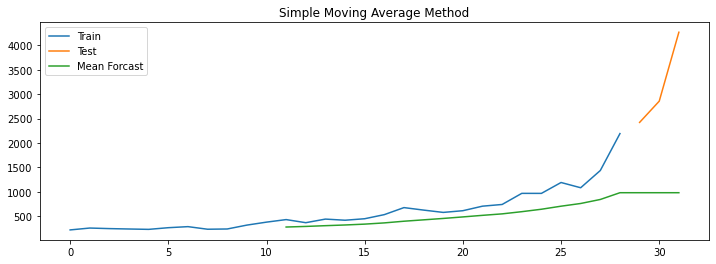

In [1055]:
# Plotting train, test, forcast
plt.figure(figsize=(12,4))
plt.plot(bittrain['Price'], label='Train')
plt.plot(bittest['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast_12'], label='Mean Forcast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [1056]:
y_hat_sma['sma_forecast_12'][bittrain_len:]
bit['Price'][bittrain_len:]

Month
29    2420.7
30    2856.0
31    4268.8
Name: Price, dtype: float64

In [1057]:
# RMSE and MAPE for Simple Average Method
rmse = np.sqrt(mean_squared_error(bittest['Price'],y_hat_sma['sma_forecast_12'][bittrain_len:])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_sma['sma_forecast_12'][bittrain_len:])/bittest['Price'])*100,2)

In [1058]:
# Simple Moving Average Method
tempResult = pd.DataFrame({'Method':['Simple Moving Average 12months Window'], 'RMSE':[rmse], 'MAPE':[mape]})
bitresults = pd.concat([bitresults,tempResult])
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19
0,Simple Moving Average 12months Window,2338.94,67.42


In [1059]:
# Simple Moving Average Method
ma_window = 6
y_hat_sma = bit.copy()
y_hat_sma['sma_forecast_6']= y_hat_sma['Price'].rolling(ma_window).mean().round(2)
y_hat_sma['sma_forecast_6'][bittrain_len:] = y_hat_sma['sma_forecast_6'][bittrain_len-1]

# RMSE and MAPE for Simple Average Method
rmse = np.sqrt(mean_squared_error(bittest['Price'],y_hat_sma['sma_forecast_6'][bittrain_len:])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_sma['sma_forecast_6'][bittrain_len:])/bittest['Price'])*100,2)

# Simple Moving Average Method
tempResult = pd.DataFrame({'Method':['Simple Moving Average 6months Window'], 'RMSE':[rmse], 'MAPE':[mape]})
bitresults = pd.concat([bitresults,tempResult])
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19
0,Simple Moving Average 12months Window,2338.94,67.42
0,Simple Moving Average 6months Window,2035.79,56.61


In [1060]:
# Simple Moving Average Method
ma_window = 3
y_hat_sma = bit.copy()
y_hat_sma['sma_forecast_3']= y_hat_sma['Price'].rolling(ma_window).mean().round(2)
y_hat_sma['sma_forecast_3'][bittrain_len:] = y_hat_sma['sma_forecast_3'][bittrain_len-1]

# RMSE and MAPE for Simple Average Method
rmse = np.sqrt(mean_squared_error(bittest['Price'],y_hat_sma['sma_forecast_3'][bittrain_len:])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_sma['sma_forecast_3'][bittrain_len:])/bittest['Price'])*100,2)

# Simple Moving Average Method
tempResult = pd.DataFrame({'Method':['Simple Moving Average 3months Window'], 'RMSE':[rmse], 'MAPE':[mape]})
bitresults = pd.concat([bitresults,tempResult])
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19
0,Simple Moving Average 12months Window,2338.94,67.42
0,Simple Moving Average 6months Window,2035.79,56.61
0,Simple Moving Average 3months Window,1794.92,47.81


In [1061]:
# Simple Exponential Smoothing model with an optimized smoothing level
#importing required libraries
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [1062]:
model = SimpleExpSmoothing(np.array(bittrain['Price']))
model_fit = model.fit(optimized=True)
y_hat_ses_bit = bittest.copy()
y_hat_ses_bit['ses_forecast'] = model_fit.forecast(3)

In [1063]:
model_fit.params

{'smoothing_level': 1.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 217.403610619585,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1064]:
rmse = np.sqrt(mean_squared_error(bittest['Price'], y_hat_ses_bit['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_ses_bit['ses_forecast'])/bittest['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
bitresults = pd.concat([bitresults, tempResults])
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19
0,Simple Moving Average 12months Window,2338.94,67.42
0,Simple Moving Average 6months Window,2035.79,56.61
0,Simple Moving Average 3months Window,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12


# Holts Winter Exponential Smoothing

In [1065]:
# importing required libtraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [1066]:
model = ExponentialSmoothing(np.array(bittrain['Price']), seasonal_periods=12, trend='add', seasonal=None)
model_fit = model.fit(optimized=True)
y_hat_hwa_bit = bittest.copy()
y_hat_hwa_bit['hwa_forecast'] = model_fit.forecast(3)

In [1067]:
model_fit.params

{'smoothing_level': 1.0,
 'smoothing_slope': 0.42166543817420776,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 203.68784435912738,
 'initial_slope': 13.714211507493342,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

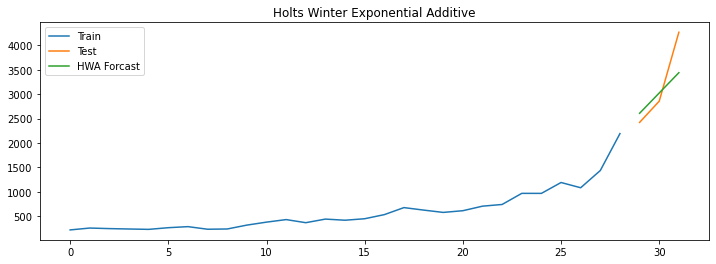

In [1068]:
# Plotting train, test, forcast
plt.figure(figsize=(12,4))
plt.plot(bittrain['Price'], label='Train')
plt.plot(bittest['Price'], label='Test')
plt.plot(y_hat_hwa_bit['hwa_forecast'], label='HWA Forcast')
plt.legend(loc='best')
plt.title('Holts Winter Exponential Additive')
plt.show()

In [1069]:
rmse = np.sqrt(mean_squared_error(bittest['Price'], y_hat_hwa_bit['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_hwa_bit['hwa_forecast'])/bittest['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holts Winter Exponential Additive'], 'RMSE': [rmse],'MAPE': [mape] })
bitresults = pd.concat([bitresults, tempResults])
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19
0,Simple Moving Average 12months Window,2338.94,67.42
0,Simple Moving Average 6months Window,2035.79,56.61
0,Simple Moving Average 3months Window,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holts Winter Exponential Additive,500.11,11.01


In [1070]:
# Graded Set2 Question 2
model = ExponentialSmoothing(np.array(bittrain['Price']), seasonal_periods=3, trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
y_hat_hwa_bit_add = bittest.copy()
y_hat_hwa_bit_add['hwa_forecast'] = model_fit.forecast(3)

rmse = np.sqrt(mean_squared_error(bittest['Price'], y_hat_hwa_bit_add['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_hwa_bit_add['hwa_forecast'])/bittest['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holts Winter Exponential Additive SPeriod 3'], 'RMSE': [rmse],'MAPE': [mape] })
bitresults = pd.concat([bitresults, tempResults])
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19
0,Simple Moving Average 12months Window,2338.94,67.42
0,Simple Moving Average 6months Window,2035.79,56.61
0,Simple Moving Average 3months Window,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holts Winter Exponential Additive,500.11,11.01
0,Holts Winter Exponential Additive SPeriod 3,509.49,10.26


In [1071]:
# Graded Set2 Question 2
model = ExponentialSmoothing(np.array(bittrain['Price']), seasonal_periods=3, trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
y_hat_hwa_bit_mul = bittest.copy()
y_hat_hwa_bit_mul['hwa_forecast'] = model_fit.forecast(3)

rmse = np.sqrt(mean_squared_error(bittest['Price'], y_hat_hwa_bit_mul['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_hwa_bit_mul['hwa_forecast'])/bittest['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holts Winter Exponential Multplicative SPeriod 3'], 'RMSE': [rmse],'MAPE': [mape] })
bitresults = pd.concat([bitresults, tempResults])
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19
0,Simple Moving Average 12months Window,2338.94,67.42
0,Simple Moving Average 6months Window,2035.79,56.61
0,Simple Moving Average 3months Window,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holts Winter Exponential Additive,500.11,11.01
0,Holts Winter Exponential Additive SPeriod 3,509.49,10.26
0,Holts Winter Exponential Multplicative SPeriod 3,735.31,15.38


# Graded Questions End

# Auto Regressive Methods

## Statationary vs Non-stationary time series

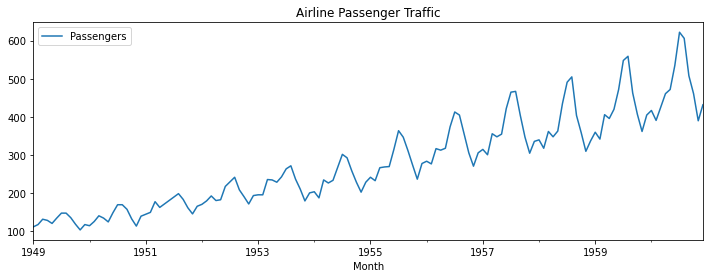

In [1072]:
# Plotting the Time series plot for passenger data
data['Passengers'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger Traffic')
plt.show()

By visualising itself, we can say that is not stationary time series as mean is changing over the time

#### Formal Test for stationarity

#### Augemented Dicky Fuller Test

In [1073]:
# importing statsmodel library for adfuller test
from statsmodels.tsa.stattools import adfuller

In [1074]:
# Test
adf_test = adfuller(data['Passengers'])
print('ADF Statistics %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f'% adf_test[4]['5%'])
print('p-value %f' % adf_test[1])

ADF Statistics 0.894609
Critical Values @ 0.05: -2.88
p-value 0.993020


In [1075]:
adf_test

(0.894608794082385,
 0.9930195647605924,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 993.7736365973918)

### KPSS Test

In [1076]:
# importing required library
from statsmodels.tsa.stattools import kpss

In [1077]:
# Test
kpss_test = kpss(data['Passengers'])
print('KPSS Statistics: %f' %kpss_test[0])
print('Critical values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p values: %f' % kpss_test[1])


KPSS Statistics: 1.052050
Critical values @ 0.05: 0.46
p values: 0.010000


In [1078]:
kpss_test

(1.0520501504573108,
 0.01,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# Box Cox Transformation
-- Power transformation

In [1079]:
# Importing required library
from scipy.stats import boxcox

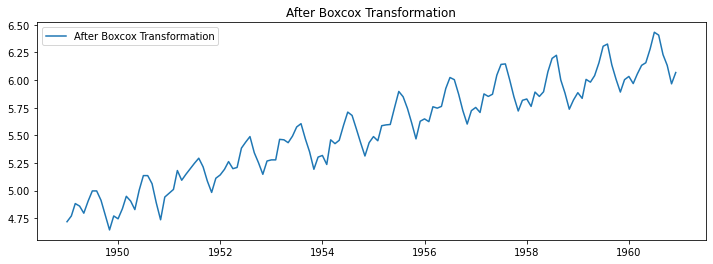

In [1080]:
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda=0), index=data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Boxcox Transformation')
plt.legend(loc='best')
plt.title('After Boxcox Transformation')
plt.show()

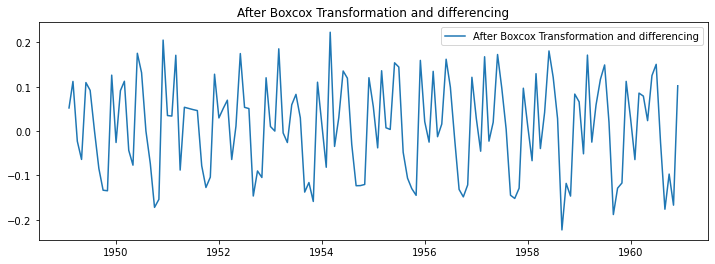

In [1081]:
# Differencing
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift())
data_boxcox_diff.dropna(inplace=True)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Boxcox Transformation and differencing')
plt.legend(loc='best')
plt.title('After Boxcox Transformation and differencing')
plt.show()

In [1082]:
# Stationarity Check
# Augmented Dickney Fuller Test
data_adf_test = adfuller(data_boxcox_diff)
print('ADF Statistics: %f' % data_adf_test[0])
print('Critical Values @ 0.05: %.2f' % data_adf_test[4]['5%'])
print('P-value: %f' % data_adf_test[1])

ADF Statistics: -3.290114
Critical Values @ 0.05: -2.88
P-value: 0.015326


P-value is less than .05 and also ADF Statistics is less than Critical Value, we can say that data is stationary

In [1083]:
# KPSS Test
data_kpss_test = kpss(data_boxcox_diff)
print('KPSS Statistics: %f' % data_kpss_test[0])
print('Critical Values @ 0.05: %.2f' % data_kpss_test[3]['5%'])
print('P-value: %f' % data_kpss_test[1])

KPSS Statistics: 0.101871
Critical Values @ 0.05: 0.46
P-value: 0.100000


In [1084]:
data_boxcox_diff.shape

(143,)

# Plotting Autocorrelation Function(ACF)

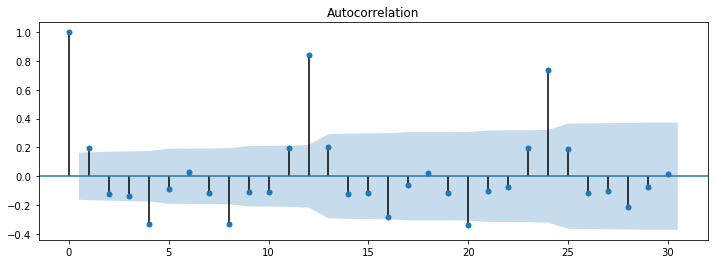

In [1085]:
# Plotting Autocorrelation Function to find the number of p(lag order)
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(),lags=30)
plt.show()

# Plotting Partial Autocorrelation Function(PACF)

In [1086]:
# Importing required library
from statsmodels.graphics.tsaplots import plot_pacf

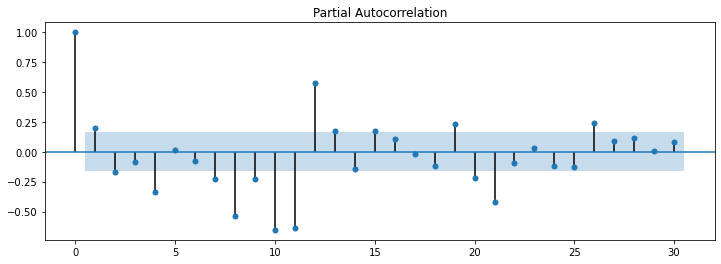

In [1087]:
# Checking partial auto correlation
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

# Train and Test Split of the data

In [1088]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [1089]:
train_data_boxcox_diff.shape

(119,)

# Auto regressive Model(AR)

In [1090]:
# Importing the required library
from statsmodels.tsa.arima_model import ARIMA

In [1091]:
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))
model_fit = model.fit()
print(model_fit.params)

const      0.009477
ar.L1.y    0.183116
dtype: float64


# Recover original time series

In [1092]:
# Recovery the original series
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox']=y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test, forecast

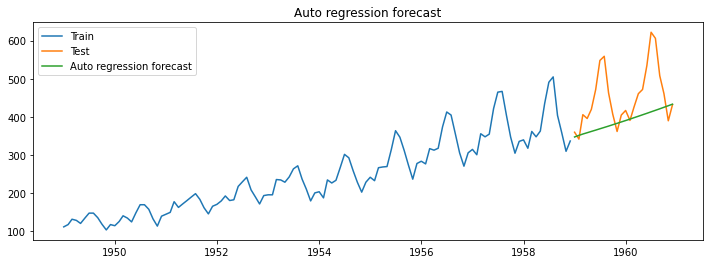

In [1093]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto regression forecast')
plt.show()

# Calculate RMSE and MAPE

In [1094]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(y_hat_ar['ar_forecast'][test.index.min():]-test['Passengers'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Auto Regressive Model(AR)'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holt Exponential Smoothing,71.94,11.11
0,Holt Winters's Additive,35.10,6.53
0,Holt Winters's Additive,34.87,6.92
0,Auto Regressive Model(AR),93.39,13.77


# Moving Average Model(MA)

In [1095]:
# Creating model Moving Average Window
model = ARIMA(train_data_boxcox_diff, order=(0,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.009538
ma.L1.y    0.266103
dtype: float64


# Recovery the original time series

In [1096]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

#### Plot Train, test and forecast

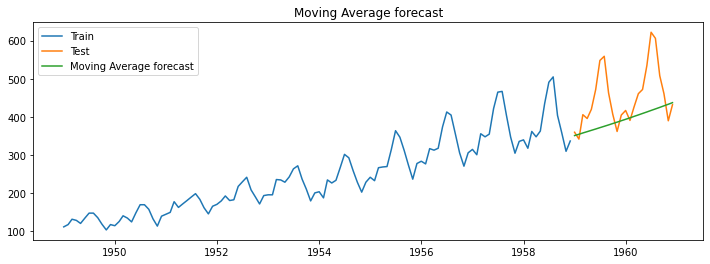

In [1097]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving Average forecast')
plt.legend(loc='best')
plt.title('Moving Average forecast')
plt.show()

### RMSE and MAPE result

In [1098]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average(MA) Method'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holt Exponential Smoothing,71.94,11.11
0,Holt Winters's Additive,35.10,6.53
0,Holt Winters's Additive,34.87,6.92
0,Auto Regressive Model(AR),93.39,13.77
0,Moving Average(MA) Method,91.21,13.39


# ARMA Model(Autoregressive and Moving Average)

In [1099]:
model = ARIMA(train_data_boxcox_diff, order=(1,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.009624
ar.L1.y   -0.527115
ma.L1.y    0.798281
dtype: float64


In [1100]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

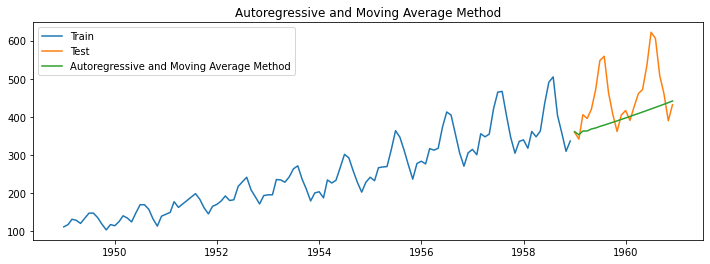

In [1101]:
# Plot Train, Test and Forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test_data_boxcox.index.min():], label='Autoregressive and Moving Average Method')
plt.legend(loc='best')
plt.title('Autoregressive and Moving Average Method')
plt.show()

In [1102]:
# RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_arma['arma_forecast'][test.index.min():])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_arma['arma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Auto Regressive and Moving Average(ARMA) Method'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holt Exponential Smoothing,71.94,11.11
0,Holt Winters's Additive,35.10,6.53
0,Holt Winters's Additive,34.87,6.92
0,Auto Regressive Model(AR),93.39,13.77
0,Moving Average(MA) Method,91.21,13.39
0,Auto Regressive and Moving Average(ARMA) Method,88.88,12.89


## Auto Regressive Integrated Moving Average(ARIMA)

In [1104]:
# Creating ARIMA Model
model = ARIMA(train_data_boxcox, order=(1,1,1))
model_fit = model.fit()
print(model_fit.params)

const        0.009624
ar.L1.D.y   -0.527115
ma.L1.D.y    0.798281
dtype: float64


In [1106]:
# Recover the original series
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

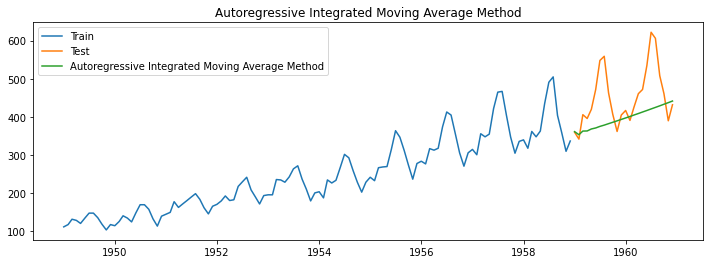

In [1107]:
# Plot Train, test and forecast
# Plot Train, Test and Forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test_data_boxcox.index.min():], label='Autoregressive Integrated Moving Average Method')
plt.legend(loc='best')
plt.title('Autoregressive Integrated Moving Average Method')
plt.show()

In [1108]:
# RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_arima['arima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Auto Regressive Integreted Moving Average(ARMA) Method'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holt Exponential Smoothing,71.94,11.11
0,Holt Winters's Additive,35.10,6.53
0,Holt Winters's Additive,34.87,6.92
0,Auto Regressive Model(AR),93.39,13.77
0,Moving Average(MA) Method,91.21,13.39
0,Auto Regressive and Moving Average(ARMA) Method,88.88,12.89


# Seasonality Autoregressive Integrated Moving Average(SARIMA)

In [1111]:
# importing required library
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [1113]:
model = SARIMAX(train_data_boxcox, order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit = model.fit()
print(model_fit.params)

ar.L1       0.390563
ma.L1      -0.681433
ar.S.L12   -0.039875
ma.S.L12   -0.517378
sigma2      0.001408
dtype: float64


In [1115]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

## Plot train, test and forecast

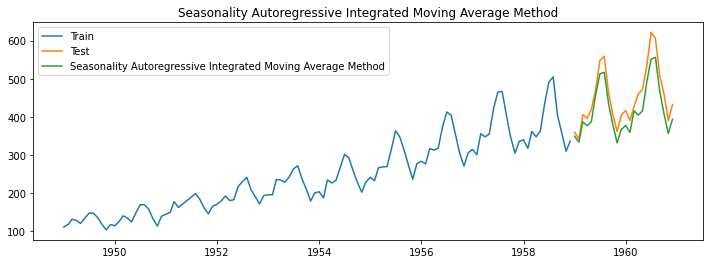

In [1116]:
# Plot Train, Test and Forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_data_boxcox.index.min():], label='Seasonality Autoregressive Integrated Moving Average Method')
plt.legend(loc='best')
plt.title('Seasonality Autoregressive Integrated Moving Average Method')
plt.show()

In [1117]:
# RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasionality AutoRegressive Integreted Moving Average(SARMA) Method'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holt Exponential Smoothing,71.94,11.11
0,Holt Winters's Additive,35.10,6.53
0,Holt Winters's Additive,34.87,6.92
0,Auto Regressive Model(AR),93.39,13.77
0,Moving Average(MA) Method,91.21,13.39
0,Auto Regressive and Moving Average(ARMA) Method,88.88,12.89


# SARIMAX(Seasonal Autoregressive Integrated Moving Average External Variable

In [1163]:
# Importing Event data
promo = pd.read_csv('promotion.csv', header=None)
promo.columns = ['Month', 'Event']
promo['Month'] = pd.to_datetime(promo['Month'], format='%Y-%m')
# promo['Month'] = promo.Month - 10
promo = promo.set_index('Month')
promo

,Event
Month,
1949-01-01,0
1949-02-01,0
1949-03-01,0
1949-04-01,0
1949-05-01,0
...,...
1960-08-01,1
1960-09-01,1
1960-10-01,1


In [1164]:
data.shape

(144, 1)

In [1165]:
# Train and Test split of the promiotion data
train_promo = promo[:train_len]
test_promo = promo[train_len:]

In [1166]:
train_data_boxcox.tail()

Month
1958-08-01    6.224558
1958-09-01    6.001415
1958-10-01    5.883322
1958-11-01    5.736572
1958-12-01    5.820083
dtype: float64

In [1167]:
train_promo.tail()

,Event
Month,
1958-08-01,1
1958-09-01,0
1958-10-01,0
1958-11-01,0
1958-12-01,0


In [1168]:
# Building SARIMAX model
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12), exog=train_promo)
model_fit = model.fit()
print(model_fit.params)

Event       0.034434
ar.L1       0.481279
ma.L1      -0.743595
ar.S.L12   -0.061725
ma.S.L12   -0.560376
sigma2      0.001334
dtype: float64


In [1170]:
y_hat_sarimax = train_data_boxcox.copy()
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(test.index.min(), test.index.max(), exog=test_promo)
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])

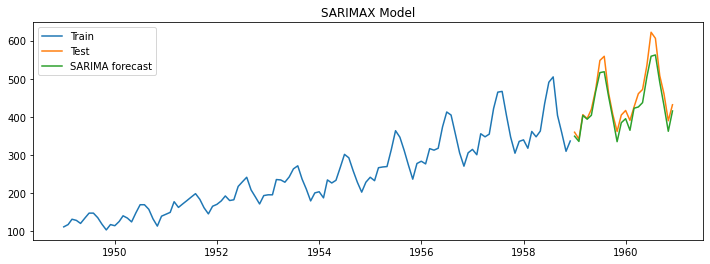

In [1171]:
# Train , test , forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarimax['sarimax_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('SARIMAX Model')
plt.show()

In [1172]:
# RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_sarimax['sarimax_forecast'][test.index.min():])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_sarimax['sarimax_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['SARMAX Method'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holt Exponential Smoothing,71.94,11.11
0,Holt Winters's Additive,35.10,6.53
0,Holt Winters's Additive,34.87,6.92
0,Auto Regressive Model(AR),93.39,13.77
0,Moving Average(MA) Method,91.21,13.39
0,Auto Regressive and Moving Average(ARMA) Method,88.88,12.89


## Choosing the right model

In [1187]:
# Daiy Temperature data
temp = pd.read_csv('Temperature2.csv')
temp = temp[['Year-Month','Temperature']]
temp = temp.rename(columns={'Year-Month':'Month'})
temp['Month'] = pd.to_datetime(temp['Month'], format='%Y-%m')
temp=temp.set_index('Month')

In [1191]:
temp.shape

(60, 1)

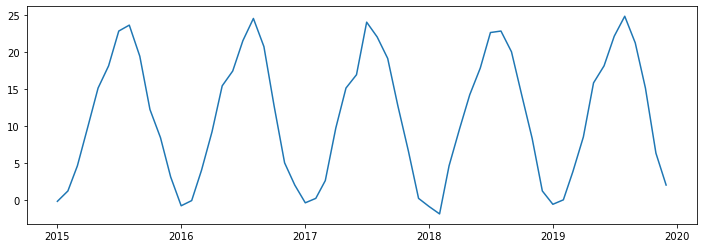

In [1190]:
plt.figure(figsize=(12,4))
plt.plot(temp)
plt.show()

In [1217]:
# Splitting the dataset
train_temp = temp.head(50)
test_temp = temp.tail(10)

In [1218]:
train_temp.shape

(50, 1)

In [1219]:
# Building Holt Winter Additive Method
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [1220]:
model = ExponentialSmoothing(np.asarray(train_temp['Temperature']) ,seasonal_periods=12 ,trend='additive', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.10526248035982305, 'smoothing_slope': 0.10526891694150398, 'smoothing_seasonal': 0.31578971902784586, 'damping_slope': nan, 'initial_level': 0.009999935634183192, 'initial_slope': 0.009999935634183192, 'initial_seasons': array([ 0.37999742,  1.77998013,  5.17999359, 10.48000078, 15.680006  ,
       18.67999644, 23.3800047 , 24.18000274, 19.98001798, 12.78002136,
        8.97997432,  3.67997704]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [1223]:
y_hat_hwa = test_temp.copy()
y_hat_hwa['hwa_forecast'] = model_fit.forecast(10)

In [1224]:
rmse = np.sqrt(mean_squared_error(test_temp['Temperature'], y_hat_hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_temp['Temperature']-y_hat_hwa['hwa_forecast'])/test_temp['Temperature'])*100,2)


In [1225]:
print(rmse, mape)

1.08 8.59


## Exchange+Rate+1

In [1336]:
# Importing the Exchange+Rate+1
rate = pd.read_csv('Exchange+Rate+1.csv')
# rate['Date'] = pd.to_datetime(rate['Date'])
# rate = rate.sort_values(by='Date', ascending=True)
rate = rate.set_index('Date')

In [1337]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 12-08-2019 to 20-08-2019
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Exchange Rate  7 non-null      float64
dtypes: float64(1)
memory usage: 112.0+ bytes


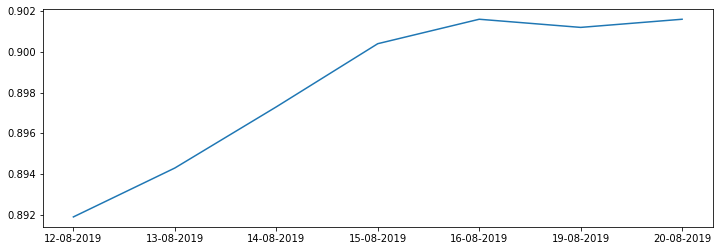

In [1338]:
plt.figure(figsize=(12,4))
plt.plot(rate)

Plot the forecast for the data set by taking train = 5 and test = 2 
using all the three methods: the simple moving average, the naive Method and the simple average method. 
    Which method’s forecast plot is closest to the actual value?

In [1339]:
train_rate = rate.head(5)
test_rate = rate.tail(2)

In [1340]:
test_rate.shape

(2, 1)

In [1341]:
#### Naive Mathod
naive = test_rate.copy()
naive['nv_forecast'] =  train_rate['Exchange Rate'][4]

In [1342]:
#### Simple Average Method
simpleA = test_rate.copy()
simpleA['sa_forecast'] =  train_rate['Exchange Rate'].mean()

In [1344]:
#### Simple Average Method
simpleMA = rate.copy()
simpleMA['sma_forecast'] =  train_rate['Exchange Rate'].rolling(2).mean()
simpleMA['sma_forecast'][5:] = simpleMA['sma_forecast'][4]

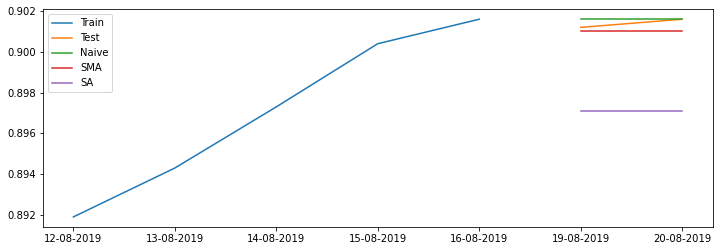

In [1348]:
#### Plotting
plt.figure(figsize=(12,4))
# plt.plot(rate['Exchange Rate'], label='Actual')
plt.plot(train_rate['Exchange Rate'], label='Train')
plt.plot(test_rate['Exchange Rate'], label='Test')
plt.plot(naive['nv_forecast'], label='Naive')
plt.plot(simpleMA['sma_forecast'][5:], label='SMA')
plt.plot(simpleA['sa_forecast'], label='SA')

plt.legend(loc='best')




In [1351]:
naive_mape = np.round(np.mean(np.abs(test_rate['Exchange Rate']-naive['nv_forecast'])/test_rate['Exchange Rate'])*100,2)
sa_mape = np.round(np.mean(np.abs(test_rate['Exchange Rate']-simpleA['sa_forecast'])/test_rate['Exchange Rate'])*100,2)
sma_mape = np.round(np.mean(np.abs(test_rate['Exchange Rate']-simpleMA['sma_forecast'][5:])/test_rate['Exchange Rate'])*100,2)

In [1353]:
print('Naive: {0},Simple Average {1}, Simple Moving Average {2}'.format(naive_mape,sa_mape,sma_mape))

Naive: 0.02,Simple Average 0.48, Simple Moving Average 0.04


# Exchange+Rate+2.csv

In [1356]:
rate2 = pd.read_csv('Exchange+Rate+2.csv')
rate2 = rate2.set_index('Date')

In [1358]:
rate2.head()

,Exchange Rate
Date,
01-03-2019,0.8790
04-03-2019,0.8828
05-03-2019,0.8850
06-03-2019,0.8834
07-03-2019,0.8917


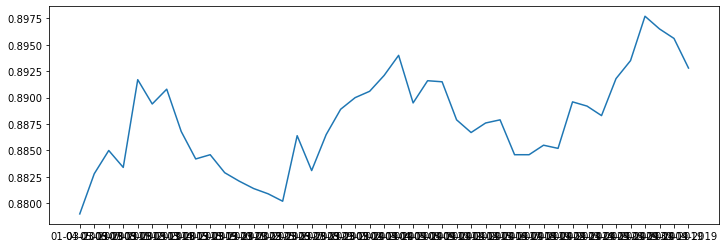

In [1359]:
plt.figure(figsize=(12,4))
plt.plot(rate2)
plt.show()

 data set shows a trend and no specific seasonality

In [1362]:
rate2.shapea

(43, 1)